## Observations and Insights 

# Three observations or inferences that can be made are: 

## 1) Capomulin and Ramicane were used more often than the other drug regimens.
## 2) There were about the same number of female and male mice. 
## 3) The Capomulin drug regiment on mouse s185 showed that overtime the drug was effective in reducing the tumor volume to almost half the size.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, 
                            how='inner', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_complete = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = combined_df['Mouse ID'].value_counts().sum()
mouse_count


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# frame.duplicated(['key1', 'key2'])
duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse = duplicate_mouse['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].value_counts().sum()
clean_mouse_count

1888

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group mice by drug regimen data frame
drug_group_df = clean_df.groupby('Drug Regimen')       

# Mean of the tumor volume
tumor_mean = drug_group_df['Tumor Volume (mm3)'].mean() 

# Median of the tumor volume
tumor_median = drug_group_df['Tumor Volume (mm3)'].median() 

# Variance of the tumor volume
tumor_variance = drug_group_df['Tumor Volume (mm3)'].var()

# STD of the tumor volume
tumor_std = drug_group_df['Tumor Volume (mm3)'].std()  

# SEM of the tumor volume
tumor_sem = drug_group_df['Tumor Volume (mm3)'].sem()  

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryStatistics = pd.DataFrame({'Tumor Vol (mm3) Mean':tumor_mean, 
                             'Tumor Vol (mm3) Median':tumor_median,
                             'Tumor Vol (mm3) Variance':tumor_variance, 
                             'Tumor Vol (mm3) Standard Deviation':tumor_std, 
                             'Tumor Vol (mm3) Standard Error Mean':tumor_sem})
summaryStatistics

,Tumor Vol (mm3) Mean,Tumor Vol (mm3) Median,Tumor Vol (mm3) Variance,Tumor Vol (mm3) Standard Deviation,Tumor Vol (mm3) Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
drug_group_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryStatistics2 = combined_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summaryStatistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
drug_count = drug_group_df['Mouse ID'].count()    
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Total Number of Measurements for Each Drug Regimens')

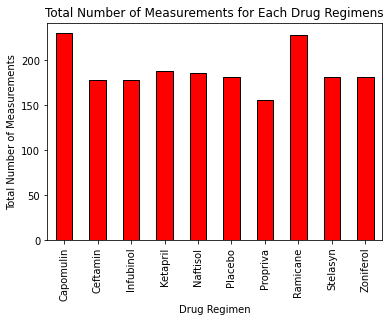

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Count the number of measurements for each drug
drug_count = drug_group_df['Mouse ID'].count()               

#Plotting Bar Graph Using Pandas
drug_count.plot(x='Drug Regimen', y='Total Number of Measurements', kind='bar', color='r', edgecolor = 'k')
plt.ylabel('Total Number of Measurements')
plt.title('Total Number of Measurements for Each Drug Regimens') 

Text(0.5, 1.0, 'Total Number of Measurements for Each Drug Regimens')

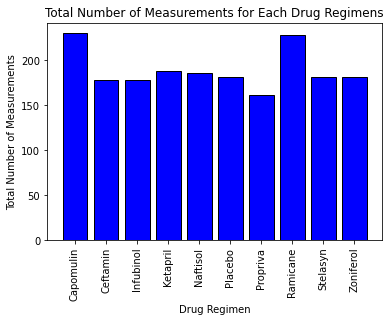

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Setting x-axis and Tick Locations
drug_group_df = combined_df.groupby('Drug Regimen') 
x_axis = np.arange(len(drug_group_df))
tick_locations = [value for value in x_axis]

#the x-axis Labels
drug_name = combined_df['Drug Regimen'].sort_values(ascending=True).unique()

#Total Number of Measurements for Each Drug
drug_count = drug_group_df['Mouse ID'].count() 
drug_count_list = [row for row in drug_count] 

#Creating the Bar Graph Using PyPlot
plt.bar(x_axis, drug_count_list, color='b',edgecolor='k')
plt.xticks(tick_locations, drug_name, rotation='vertical')       
plt.xlabel('Drug Regimen')                                       
plt.ylabel('Total Number of Measurements')                      
plt.title('Total Number of Measurements for Each Drug Regimens') 

Text(0, 0.5, '')

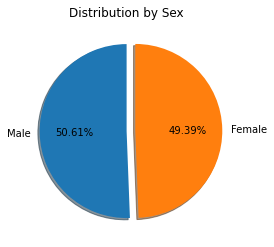

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data = combined_df['Sex'].value_counts()

explode = [0,0.1]
pie_plot = data.plot.pie(explode = explode, autopct="%1.2f%%", startangle=90, shadow = True, title='Distribution by Sex')
pie_plot.set_ylabel('')


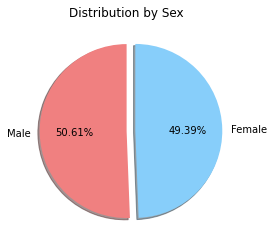

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = combined_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
explode = [0,0.1]
colors = ["lightcoral", "lightskyblue"]
plt.pie(data, labels=data.index.values, explode=explode, colors=colors, autopct="%1.2f%%", startangle=90, shadow=True)
plt.title('Distribution by Sex')

# Display resulting PyPlot
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# group by mouse id
mouse_df = combined_df.groupby('Mouse ID')  

# Create data frame on final timepoint
finalTimepoint = mouse_df['Timepoint'].max()                 
finalTimepoint = pd.DataFrame({'Final Timepoint': finalTimepoint}) 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(finalTimepoint, combined_df, on='Mouse ID')

# Locating the Timepoint that Matches the Final Timepoint. By Doing this, I can grab the Final Tumor Volume
merge_df = merge_df.loc[merge_df['Timepoint'] == merge_df['Final Timepoint'], :]

# Grabbing the Columns that I need in the Merge Mouse DataFrame
merge_df = pd.DataFrame(merge_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Final Timepoint']])

#Renaming Tumor Column
merge_df = merge_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

#Locating the Final Tumor Volume Only for Capomulin, Ramicane, Infubinol, and Ceftamin
merge_df = merge_df.loc[(merge_df['Drug Regimen']=='Capomulin') | (merge_df['Drug Regimen']=='Ramicane') |
                              (merge_df['Drug Regimen']=='Infubinol') | (merge_df['Drug Regimen']=='Ceftamin'),:]

merge_df = merge_df.reset_index()


merge_df


,index,Mouse ID,Drug Regimen,Final Tumor Volume (mm3),Final Timepoint
0,9,a203,Infubinol,67.973419,45
1,19,a251,Infubinol,65.525743,45
2,39,a275,Ceftamin,62.999356,45
3,66,a411,Ramicane,38.407618,45
4,76,a444,Ramicane,43.047543,45
...,...,...,...,...,...
95,1825,y769,Ceftamin,68.594745,45
96,1835,y793,Capomulin,31.896238,45
97,1845,y865,Ceftamin,64.729837,45
98,1862,z578,Ramicane,30.638696,45


In [17]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merge_df.loc[merge_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Final Timepoint'] == temp_df['Final Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Final Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"--------------------------------------------------------")
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Final Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Final Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

--------------------------------------------------------
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
--------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
--------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
--------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


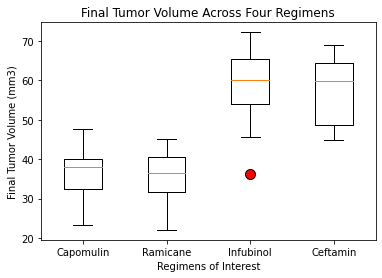

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ***NOTE*** must run previous cells in order for this cell to work

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume Across Four Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel("Regimens of Interest")

plt.show()



## Line and Scatter Plots

In [19]:
# Create a dataframe for only the Capomulin data
capomulin_data = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


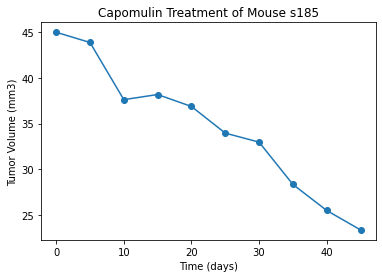

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin (mouse id = s185)
mouse = combined_df.loc[combined_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

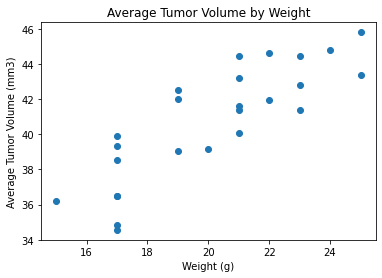

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_tumor_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_tumor_volume_df= pd.merge(capomulin_df, avg_tumor_volume_df, on='Mouse ID')
merge_volume_df = avg_tumor_volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = merge_volume_df['Weight (g)']
y = merge_volume_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


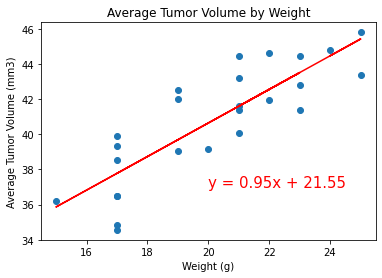

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()